## Bike Sharing Assignment

Problem Statement: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the data

In [2]:
# Read the dataset
bikes = pd.read_csv("day.csv")

In [3]:
# Looking at the first five rows of our dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the number of rows and columns
bikes.shape

(730, 16)

In [5]:
# Getting some information on the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking at the summary of the dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking if there are any null values in our dataset
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Checking the data type of 'dteday' column
bikes['dteday'].dtype

dtype('O')

In [9]:
# Converting the data type of 'dteday' column to datetime
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

In [10]:
# Extracting the year and month from the date in 'dteday' column 
bikes['year'] = pd.DatetimeIndex(bikes['dteday']).year
bikes['month'] = pd.DatetimeIndex(bikes['dteday']).month

In [11]:
# Dropping the old columns of year and month in the dataset
bikes.drop(['yr', 'mnth'], axis=1, inplace=True)

In [12]:
bikes.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-02-01,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2
2,3,2018-03-01,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3
3,4,2018-04-01,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4
4,5,2018-05-01,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5


## Step 2: Data Preparation and EDA

In [13]:
# Dropping the 'instant' column because it is shown as an index column.
# Dropping the 'dteday' column as year and month are extracted from the date.
# Dropping the 'casual' and 'registered' columns as 'cnt' column which is our target variable is the sum of these columns.

bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

We will encode the labels with appropriate values for columns- 'season', 'weathersit', 'workingday', 'month', 'weekday' as these seem to be categorical variables. And we will do the data visualization as well taking into consideration the target variable i.e. 'cnt'.

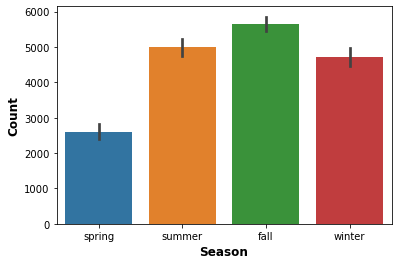

In [14]:
bikes['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
sns.barplot('season','cnt',data=bikes)
plt.xlabel('Season', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

As can be seen from the above bar chart, the bike rentals are more during 'Fall' season.

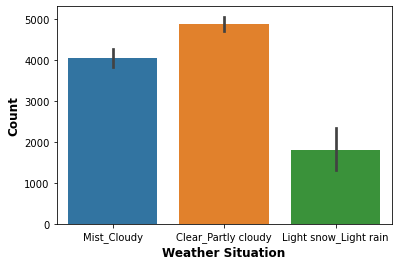

In [15]:
bikes['weathersit'].replace({1:'Clear_Partly cloudy', 2:'Mist_Cloudy', 3:'Light snow_Light rain', 4:'Heavy rain_Ice pallets'}, inplace=True)
sns.barplot('weathersit','cnt',data=bikes)
plt.xlabel('Weather Situation', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

As can be seen from the above bar chart, the bike rentals are more in partly cloudy weather.

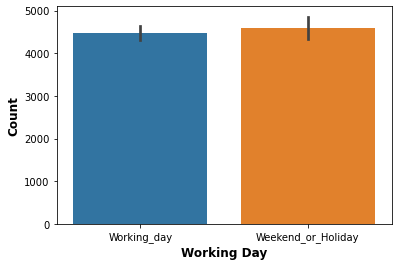

In [16]:
bikes['workingday'].replace({0:'Weekend_or_Holiday', 1:'Working_day'}, inplace=True)
sns.barplot('workingday','cnt',data=bikes)
plt.xlabel('Working Day', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

Bikes are rented more on weekends and holidays.

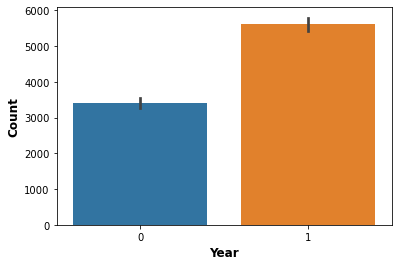

In [17]:
bikes['year'].replace({2018: 0, 2019: 1}, inplace=True)
sns.barplot('year','cnt',data=bikes)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

Bike Rentals got increased in 2019 as compared to 2018.

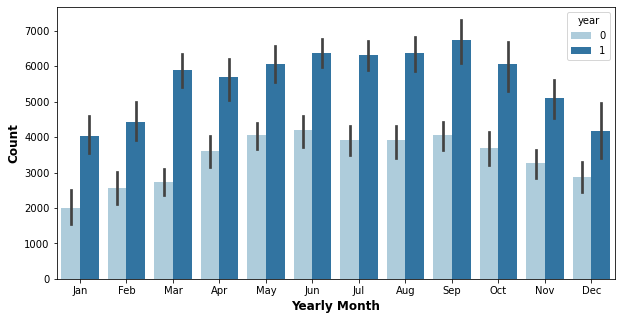

In [33]:
bikes['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
plt.figure(figsize=(10,5))
sns.barplot('month','cnt', hue='year', data=bikes, palette='Paired')
plt.xlabel('Yearly Month', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

The bike rentals are highest in September 2019.

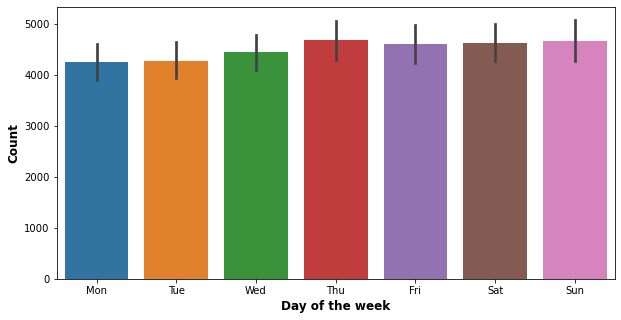

In [34]:
bikes['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
plt.figure(figsize=(10,5))
sns.barplot('weekday','cnt', data=bikes)
plt.xlabel('Day of the week', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

Bike are rented more on Thursday, Saturday and Sunday.

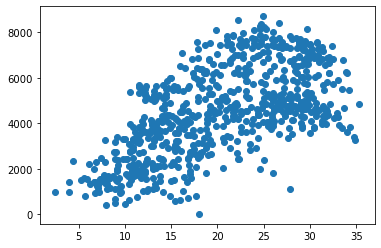

In [35]:
plt.scatter('temp', 'cnt', data=bikes)
plt.show()

Bikes are rented more during higher temperatures.

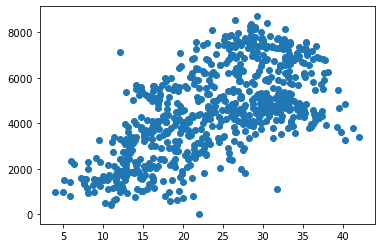

In [36]:
plt.scatter('atemp', 'cnt', data=bikes)
plt.show()

Bikes are rented more during higher feel-like temperatures.

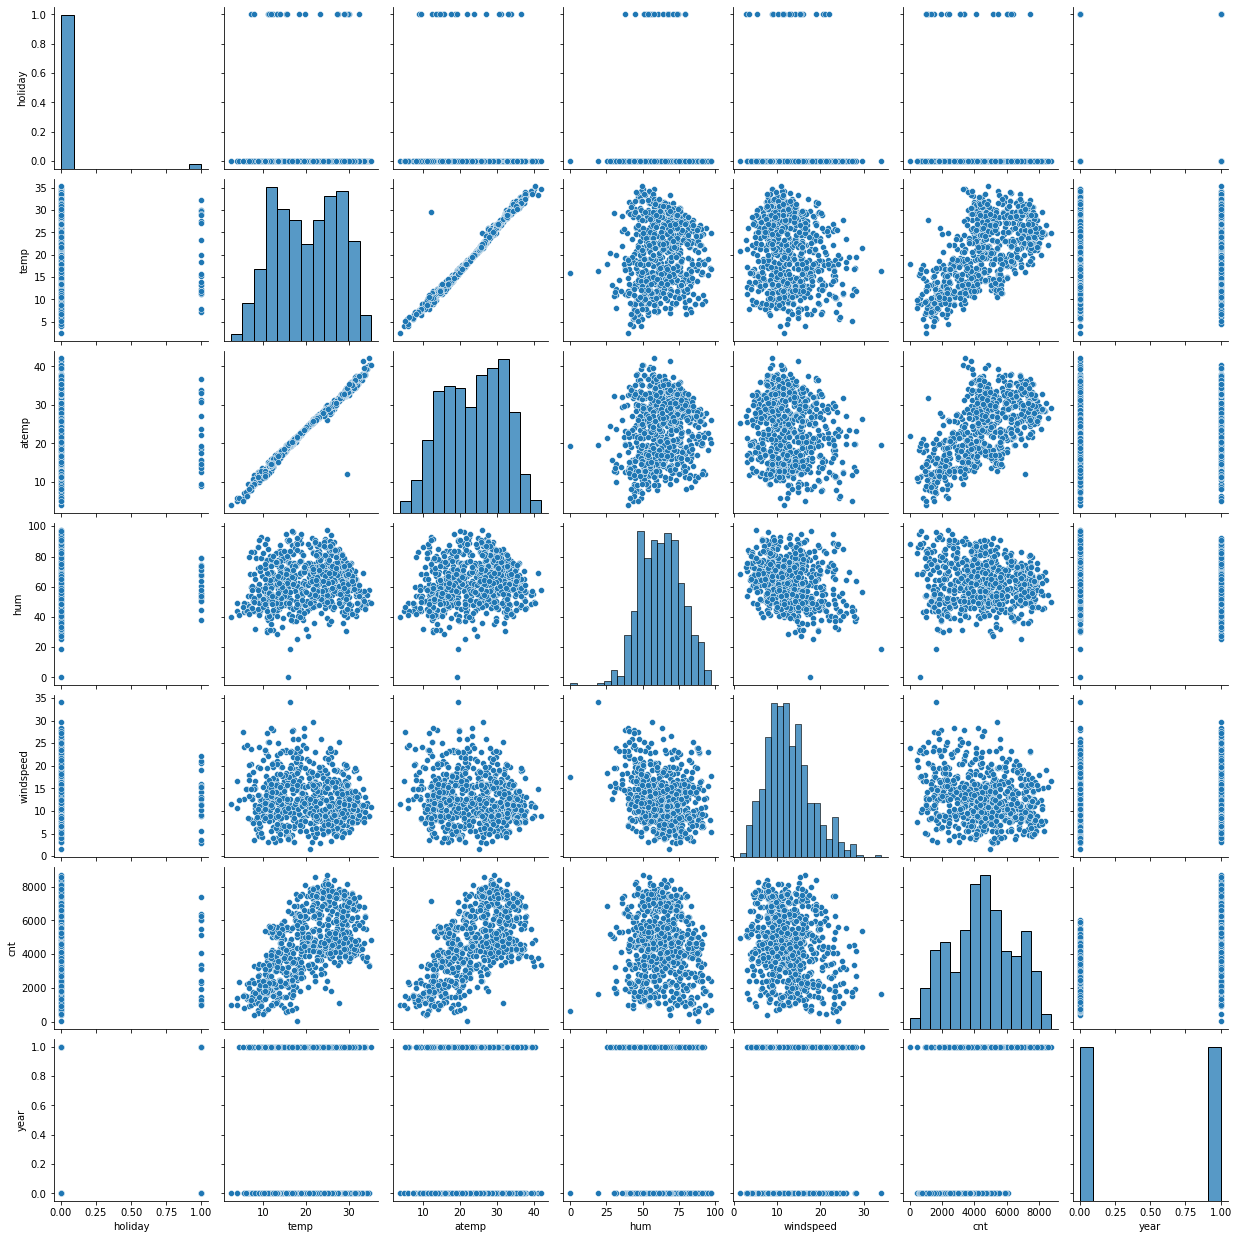

In [37]:
# Visualizing relationship among all numerical variables
sns.pairplot(bikes)
plt.show()

As we see from the above graphs, 'temp' and 'atemp' have strong relationship. So, we now check the correlation between the variables.

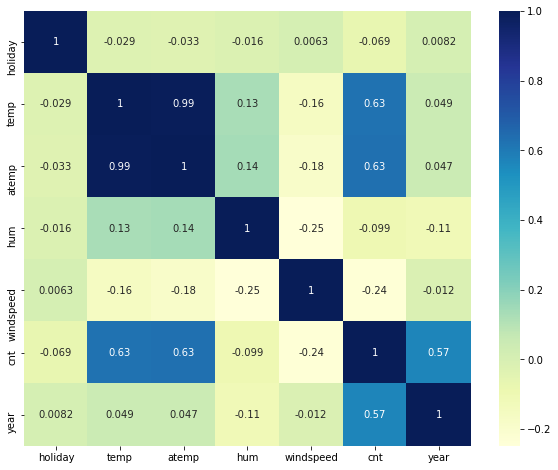

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(bikes.corr(), annot=True, cmap="YlGnBu")
plt.show()

We observed that 'temp' and 'atemp' are highly correlated to each other. Therefore, we drop 'atemp' to avoid multicollinearity.

In [39]:
bikes.drop('atemp', axis=1, inplace=True)

In [40]:
bikes.head()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,0,Mon,Working_day,Mist_Cloudy,14.110847,80.5833,10.749882,985,0,Jan
1,spring,0,Tue,Working_day,Mist_Cloudy,14.902598,69.6087,16.652113,801,0,Feb
2,spring,0,Wed,Working_day,Clear_Partly cloudy,8.050924,43.7273,16.636703,1349,0,Mar
3,spring,0,Thu,Working_day,Clear_Partly cloudy,8.200000,59.0435,10.739832,1562,0,Apr
4,spring,0,Fri,Working_day,Clear_Partly cloudy,9.305237,43.6957,12.522300,1600,0,May


#### Creating dummy variables to deal with categorical variables

In [41]:
season = pd.get_dummies(bikes['season'], drop_first=True)
weather_situation = pd.get_dummies(bikes['weathersit'], drop_first=True)
working_day = pd.get_dummies(bikes['workingday'], drop_first=True)
month = pd.get_dummies(bikes['month'], drop_first=True)
day_of_week = pd.get_dummies(bikes['weekday'], drop_first=True)

In [42]:
bikes = pd.concat([bikes, season, weather_situation, working_day, month, day_of_week], axis=1)

In [43]:
bikes.head()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Mon,Working_day,Mist_Cloudy,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Tue,Working_day,Mist_Cloudy,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Wed,Working_day,Clear_Partly cloudy,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Thu,Working_day,Clear_Partly cloudy,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Fri,Working_day,Clear_Partly cloudy,9.305237,43.6957,12.522300,1600,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping the original categorical variables as these are now encoded into dummy variables
bikes.drop(['season', 'weekday', 'workingday', 'weathersit', 'month'], axis=1, inplace=True)

In [45]:
bikes.head()

,holiday,temp,hum,windspeed,cnt,year,spring,summer,winter,Light snow_Light rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,14.110847,80.5833,10.749882,985,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,43.7273,16.636703,1349,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8.200000,59.0435,10.739832,1562,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Step 3: Splitting the data into train and test datasets

In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the features

We will use MinMax scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
df_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'cnt', 'year', 'spring',
       'summer', 'winter', 'Light snow_Light rain', 'Mist_Cloudy',
       'Working_day', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [49]:
# Applying the scaler to all the columns except the dummy variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,holiday,temp,hum,windspeed,cnt,year,spring,summer,winter,Light snow_Light rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,0,0.509887,0.575354,0.300794,0.864243,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
576,0,0.815169,0.725633,0.264686,0.827658,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,0.465255,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0.245101,0.498067,0.663106,0.204096,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0.482973,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 4: Building the model

We will using Recursive Feature Elimination (RFE) approach for Feature Selection.
We will start with 20 variables and will use mixed (automated + manual) approach to build a model.

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of variables equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)   # Running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light snow_Light rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Working_day', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 8),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', True, 1),
 ('Wed', False, 5)]

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'year', 'spring', 'summer',
       'winter', 'Light snow_Light rain', 'Mist_Cloudy', 'Working_day', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep', 'Mon', 'Sat', 'Sun', 'Tue'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
# Importing statsmodel and adding a constant variable
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [57]:
# Running the linear model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [58]:
# Looking at the summary of our first linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.95e-180
Time:                        16:34:06   Log-Likelihood:                 506.48
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     489   BIC:                            -882.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [59]:
# Calculating VIFs for the first model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,Working_day,44.44
2,hum,37.05
1,temp,22.58
18,Sun,8.87
17,Sat,8.48
5,spring,5.63
3,windspeed,5.45
7,winter,4.19
6,summer,2.82
9,Mist_Cloudy,2.43


In [60]:
# Column 'Working_day' has a high p-value as well as high VIF so we are dropping it
X_train_rfe = X_train_rfe.drop(['Working_day'], axis=1)

In [61]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [62]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()

In [63]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.58e-181
Time:                        16:34:10   Log-Likelihood:                 506.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     490   BIC:                            -887.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [64]:
# Calculating VIFs for the second model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,hum,28.19
1,temp,15.48
3,windspeed,4.75
5,spring,3.88
7,winter,3.34
6,summer,2.35
9,Mist_Cloudy,2.33
4,year,2.08
15,Mon,1.37
18,Tue,1.37


In [65]:
# Column 'hum' has a very high VIF so we are dropping it
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [66]:
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [67]:
lm3 = sm.OLS(y_train, X_train_rfe3).fit()

In [68]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-179
Time:                        16:34:11   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     491   BIC:                            -881.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [69]:
# Calculating VIFs for the third model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,4.69
1,temp,4.45
4,spring,2.32
3,year,2.08
6,winter,1.99
5,summer,1.88
8,Mist_Cloudy,1.58
17,Tue,1.36
14,Mon,1.36
16,Sun,1.33


In [70]:
# Column 'windspeed' has a very high VIF so we are dropping it
X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [71]:
X_train_rfe4 = sm.add_constant(X_train_rfe)

In [72]:
lm4 = sm.OLS(y_train, X_train_rfe4).fit()

In [73]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.10e-173
Time:                        16:34:12   Log-Likelihood:                 482.20
No. Observations:                 510   AIC:                            -928.4
Df Residuals:                     492   BIC:                            -852.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [74]:
# Calculating VIFs for the fourth model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,3.64
2,year,2.07
5,winter,1.84
3,spring,1.70
4,summer,1.63
7,Mist_Cloudy,1.58
16,Tue,1.36
13,Mon,1.35
15,Sun,1.33
11,Nov,1.32


In [75]:
# Column 'Sat' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)

In [76]:
X_train_rfe5 = sm.add_constant(X_train_rfe)

In [77]:
lm5 = sm.OLS(y_train, X_train_rfe5).fit()

In [78]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.02e-174
Time:                        16:34:13   Log-Likelihood:                 482.03
No. Observations:                 510   AIC:                            -930.1
Df Residuals:                     493   BIC:                            -858.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [79]:
# Calculating VIFs for the fifth model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,3.39
2,year,2.07
5,winter,1.82
3,spring,1.66
4,summer,1.62
7,Mist_Cloudy,1.57
11,Nov,1.32
9,Jan,1.28
15,Tue,1.28
13,Mon,1.27


In [80]:
# Column 'Sun' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Sun'], axis=1)

In [81]:
X_train_rfe6 = sm.add_constant(X_train_rfe)

In [82]:
lm6 = sm.OLS(y_train, X_train_rfe6).fit()

In [83]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.91e-175
Time:                        16:34:14   Log-Likelihood:                 481.85
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     494   BIC:                            -863.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [84]:
# Calculating VIFs for the sixth model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,3.27
2,year,2.07
5,winter,1.81
3,spring,1.63
4,summer,1.62
7,Mist_Cloudy,1.56
11,Nov,1.31
9,Jan,1.28
10,Jul,1.23
14,Tue,1.23


In [85]:
# Column 'temp' has a high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

In [86]:
X_train_rfe7 = sm.add_constant(X_train_rfe)

In [87]:
lm7 = sm.OLS(y_train, X_train_rfe7).fit()

In [88]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     111.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-142
Time:                        16:34:15   Log-Likelihood:                 400.96
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     495   BIC:                            -708.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.56

In [89]:
# Calculating VIFs for the seventh model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,winter,1.77
1,year,1.69
2,spring,1.63
6,Mist_Cloudy,1.49
3,summer,1.39
10,Nov,1.31
8,Jan,1.28
7,Dec,1.19
12,Mon,1.19
13,Tue,1.19


In [90]:
# Column 'Jul' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Jul'], axis=1)

In [91]:
X_train_rfe8 = sm.add_constant(X_train_rfe)

In [92]:
lm8 = sm.OLS(y_train, X_train_rfe8).fit()

In [93]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.57e-143
Time:                        16:34:16   Log-Likelihood:                 399.97
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     496   BIC:                            -712.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [94]:
# Calculating VIFs for the eighth model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,winter,1.77
1,year,1.63
2,spring,1.63
6,Mist_Cloudy,1.49
3,summer,1.38
9,Nov,1.31
8,Jan,1.27
7,Dec,1.19
12,Tue,1.19
11,Mon,1.17


In [95]:
# Column 'Dec' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Dec'], axis=1)

In [96]:
X_train_rfe9 = sm.add_constant(X_train_rfe)

In [97]:
lm9 = sm.OLS(y_train, X_train_rfe9).fit()

In [98]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-143
Time:                        16:34:17   Log-Likelihood:                 398.29
No. Observations:                 510   AIC:                            -770.6
Df Residuals:                     497   BIC:                            -715.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [99]:
# Calculating VIFs for the ninth model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,winter,1.66
1,year,1.63
2,spring,1.52
6,Mist_Cloudy,1.49
3,summer,1.37
8,Nov,1.28
7,Jan,1.24
11,Tue,1.19
10,Mon,1.17
9,Sep,1.09


In [100]:
 X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Thu', 'Wed'], dtype='object')

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light snow_Light rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Working_day', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 8),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', True, 1),
 ('Wed', False, 5)]

In [102]:
# Adding 'Jun' and checking if the model improves
X_train_rfe['Jun'] = X_train['Jun']

In [103]:
X_train_rfe10 = sm.add_constant(X_train_rfe)

In [104]:
lm10 = sm.OLS(y_train, X_train_rfe10).fit()

In [105]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.05e-142
Time:                        16:34:19   Log-Likelihood:                 398.52
No. Observations:                 510   AIC:                            -769.0
Df Residuals:                     496   BIC:                            -709.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [106]:
# Since 'Jun' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Jun'], axis=1)

In [107]:
# Adding 'Feb' and checking if the model improves
X_train_rfe['Feb'] = X_train['Feb']

In [108]:
X_train_rfe11 = sm.add_constant(X_train_rfe)

In [109]:
lm11 = sm.OLS(y_train, X_train_rfe11).fit()

In [110]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.30e-142
Time:                        16:34:20   Log-Likelihood:                 398.29
No. Observations:                 510   AIC:                            -768.6
Df Residuals:                     496   BIC:                            -709.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [111]:
# Since 'Feb' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Feb'], axis=1)

In [112]:
# Adding 'Aug' and checking if the model improves
X_train_rfe['Aug'] = X_train['Aug']

In [113]:
X_train_rfe12 = sm.add_constant(X_train_rfe)

In [114]:
lm12 = sm.OLS(y_train, X_train_rfe12).fit()

In [115]:
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.30e-142
Time:                        16:34:21   Log-Likelihood:                 398.29
No. Observations:                 510   AIC:                            -768.6
Df Residuals:                     496   BIC:                            -709.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [116]:
# Since 'Aug' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Aug'], axis=1)

In [117]:
# Adding 'Wed' and checking if the model improves
X_train_rfe['Wed'] = X_train['Wed']

In [118]:
X_train_rfe13 = sm.add_constant(X_train_rfe)

In [119]:
lm13 = sm.OLS(y_train, X_train_rfe13).fit()

In [120]:
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.53e-143
Time:                        16:34:22   Log-Likelihood:                 398.73
No. Observations:                 510   AIC:                            -769.5
Df Residuals:                     496   BIC:                            -710.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [121]:
# Since 'Wed' has a very high p-value so we are dropping it
X_train_rfe = X_train_rfe.drop(['Wed'], axis=1)

#### We stop the model building now because adding new variables is not improving the model any more. So, we are now checking which model is the best one that we can choose.
#### Model 'lm9' seems to give best results so we choose that model.

## Step 5: Residual Analysis of the train data

In [122]:
y_train_cnt = lm9.predict(X_train_rfe9)

In [123]:
# Calculating residuals
res = y_train - y_train_cnt

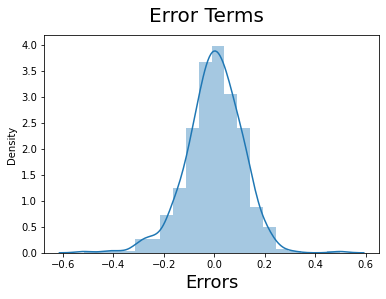

In [124]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. ninth model.

#### Applying the scaling on the test sets

In [125]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,holiday,temp,hum,windspeed,cnt,year,spring,summer,winter,Light snow_Light rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,1,0.837241,0.534223,0.149393,0.704300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,0,0.911423,0.470417,0.231142,0.725421,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0.496221,0.777843,0.443398,0.278853,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0.890387,0.236659,0.449707,0.545512,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0.821739,0.070765,0.682387,0.569148,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [126]:
y_test = df_test.pop('cnt')
X_test = df_test

In [127]:
X_train_new = X_train_rfe9.drop(['const'], axis=1)

In [128]:
# Now let's use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [129]:
# Making predictions
y_test_pred = lm9.predict(X_test_new)

## Step 7: Model Evaluation

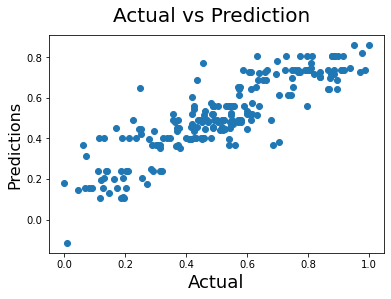

In [130]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Prediction', fontsize=20)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=16)
plt.show()

The actual and predicted cnt that tells the bike rental count significantly overlapped, thus indicating that the model is able to explain the change in demand for shared bikes very well.

In [131]:
# Importing library to evaluate the model using R-square
from sklearn.metrics import r2_score

In [132]:
# Calculating R-square
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7543249357422641

In [133]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-143
Time:                        16:34:27   Log-Likelihood:                 398.29
No. Observations:                 510   AIC:                            -770.6
Df Residuals:                     497   BIC:                            -715.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

#### We can see that the equation of our best fitted line is:

$ cnt = 0.5569 + 0.247 \times year + 0.054 \times Sep - 0.089 \times holiday - 0.316 \times spring - 0.068 \times summer - 0.076 \times winter - 0.308 \times Light snowLight rain - 0.086 \times MistCloudy - 0.049 \times Jan - 0.043 \times Nov - 0.037 \times Mon - 0.036 \times Tue $

#### The following variables seem to be affecting demand for bikes:

1. The bike rental count is highest in the month of September when the fall season starts.
2. The demand for bikes get decreased in spring, summer and winter seasons.
3. The demand for bikes also get decreased when the weather situation is light snow or light rain and mist or cloudy.
4. The demand for bikes is low on holidays and on Monday and Tuesday.
5. The demand for bikes got increased in the year 2019.

#### Therefore, it is recommended that the company should consider all the above mentioned factors in order to improve the demand for its shared bikes in the market.